<a href="https://colab.research.google.com/github/Dpgofast/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Dakota_DS1_Polynomial_Log_linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## You model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
#Imports here
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [0]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
##### Your Code Here #####
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'
df = pd.read_csv(url)
df.head()
# columns ill drop for now 
#[['Alley','PoolQC','Fence','MiscFeature']] These features had over 1000 NAN values 
dropped = df.drop(columns = ['Alley','PoolQC','Fence','MiscFeature'])
#dropped.dtypes


In [74]:
#Has NAN needs cleaned [LotFrontage 259,BsmtQual 37,BsmtCond 37,BsmtExposure 38,BsmtFinType1 37,Electrical 1,FireplaceQu 690,GarageType 81,
#GarageYrBlt 81,GarageFinish 81,GarageQual 81,GarageCond 81,MasVnrType 8MasVnrArea 8,BsmtFinType2 ]

dropped.LotFrontage.fillna(dropped.LotFrontage.mean(),inplace = True)
dropped.BsmtQual.fillna(dropped.BsmtQual.describe().top, inplace = True)
dropped.BsmtCond.fillna(dropped.BsmtCond.describe().top, inplace = True)
dropped.BsmtExposure.fillna(dropped.BsmtExposure.describe().top, inplace = True)
dropped.BsmtFinType1.fillna(dropped.BsmtFinType1.describe().top, inplace = True)
dropped.Electrical.fillna(dropped.Electrical.describe().top,inplace = True)
dropped.FireplaceQu.fillna(dropped.FireplaceQu.describe().top,inplace = True)
dropped.GarageType.fillna(dropped.GarageType.describe().top,inplace = True)
dropped.GarageYrBlt.fillna(dropped.GarageYrBlt.mean(),inplace = True)
dropped.GarageFinish.fillna(dropped.GarageFinish.describe().top,inplace = True)
dropped.GarageQual.fillna(dropped.GarageQual.describe().top,inplace = True)
dropped.GarageCond.fillna(dropped.GarageCond.describe().top,inplace = True)
dropped.MasVnrType.fillna(dropped.MasVnrType.describe().top,inplace = True)
dropped.MasVnrArea.fillna(dropped.MasVnrArea.mean(),inplace = True)
dropped.BsmtFinType2 .fillna(dropped.BsmtFinType2 .describe().top,inplace = True)
dropped.isnull().sum().sum()
# now that that's done all nans are handled 
# Next is encoding all objects 

0

In [0]:
# lets encode all Object Dtypes 
#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df
      

In [0]:
encoded = dummyEncode(dropped)
encoded.drop(columns=['Id'], inplace = True)
#all objects appear to be encoded

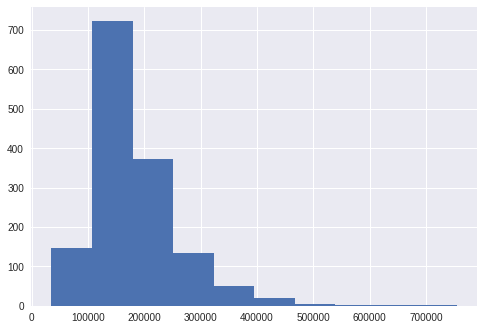

In [88]:
encoded['log_price'] = np.log(encoded['SalePrice'])
encoded.SalePrice.hist()

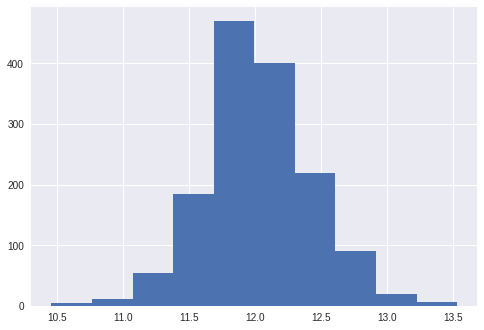

In [89]:
encoded.log_price.hist()

In [0]:
encoded.drop(columns = ['SalePrice'],inplace = True)


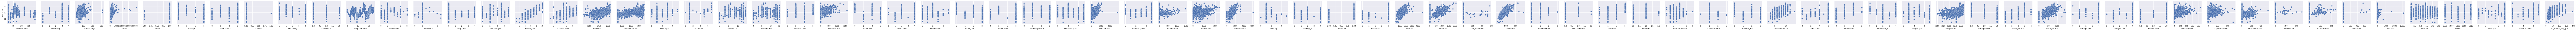

In [120]:
x_columns = encoded.columns.drop('log_price')
encoded['sq_rooms_ab_grn'] = encoded['TotRmsAbvGrd']**2
sns.pairplot(data=encoded, y_vars=['log_price'], x_vars=x_columns)

In [121]:
encoded.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
      

Log normalize Y with 

In [133]:
y = encoded.loc[:, ['log_price']].values
X = encoded.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 
                    'Street', 'LotShape', 'LandContour', 'Utilities', 
                    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
                    'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 
                    'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 
                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                    'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 
                    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                    'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 
                    'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
                    'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
                    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 
                    'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 
                    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
                    'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 
                    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                    'ScreenPorch', 'PoolArea', 'MiscVal','MoSold', 'YrSold', 
                    'SaleType', 'SaleCondition','sq_rooms_ab_grn']].values
listcols = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 
                    'Street', 'LotShape', 'LandContour', 'Utilities', 
                    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
                    'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 
                    'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 
                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                    'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 
                    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                    'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 
                    'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
                    'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
                    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 
                    'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 
                    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
                    'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 
                    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                    'ScreenPorch', 'PoolArea', 'MiscVal','MoSold', 'YrSold', 
                    'SaleType', 'SaleCondition']


# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

#print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 0.15331642624266392
R^2 is 0.8590400560358985
intercepts:  [24.14455697]


# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Start studying for tomorrow's topic: Gradient Descent
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data